In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import pycountry

## Lettura CSV

In [2]:
df = pd.read_csv('data_science_salaries.csv')
df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


## Confronto media, min e max salari per posizione

In [3]:
df.groupby('job_title')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
AI Architect,10.0,232058.600000,68939.474466,137000.0,198987.50,209968.0,295325.00,330000.0
AI Developer,18.0,141140.888889,72934.543987,50000.0,76162.25,127000.0,198000.00,275000.0
AI Engineer,48.0,162616.250000,88607.412507,21593.0,94818.75,163000.0,214000.00,372000.0
AI Product Manager,1.0,120000.000000,NaN,120000.0,120000.00,120000.0,120000.00,120000.0
AI Programmer,6.0,67382.333333,29568.541883,40000.0,45051.75,65103.5,73065.25,120000.0
...,...,...,...,...,...,...,...,...
Sales Data Analyst,1.0,60000.000000,NaN,60000.0,60000.00,60000.0,60000.00,60000.0
Software Data Engineer,3.0,111627.666667,86096.619541,50000.0,62441.50,74883.0,142441.50,210000.0
Staff Data Analyst,3.0,79917.000000,87940.122657,15000.0,29876.50,44753.0,112375.50,179998.0


## Salario medio per livello di esperienza

Text(0, 0.5, 'Salario Medio (USD)')

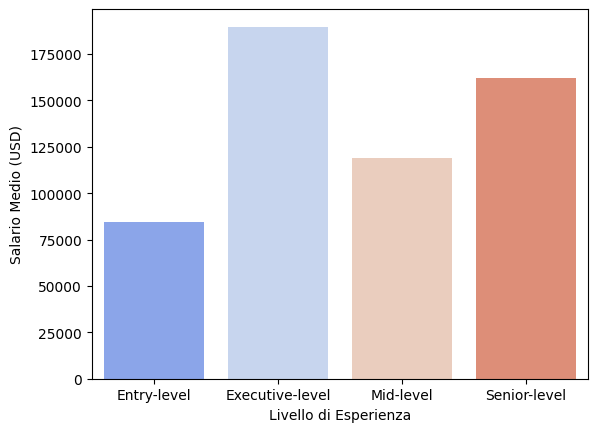

In [4]:
salario_esperienza = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
sns.barplot(data=salario_esperienza, x='experience_level', y='salary_in_usd', hue="experience_level", palette="coolwarm")
plt.xlabel('Livello di Esperienza')
plt.ylabel('Salario Medio (USD)')

## Andamento salario del ruolo "Data Analyst" negli anni

<Axes: xlabel='Anno', ylabel='Salario Medio (USD)'>

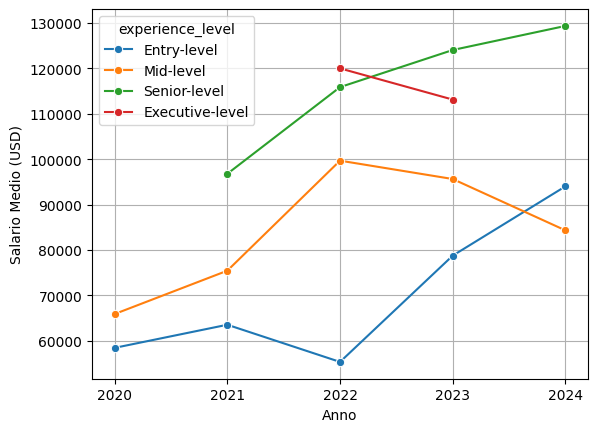

In [5]:
plt.xlabel('Anno')
plt.ylabel('Salario Medio (USD)')
plt.grid(True)
data_analyst_df = df[df['job_title'] == 'Data Analyst'].copy().sort_values(by='work_year')
data_analyst_df['work_year'] = data_analyst_df['work_year'].astype(str)
sns.lineplot(data=data_analyst_df, x='work_year', y='salary_in_usd', hue='experience_level', errorbar=None, marker='o')

## Ruolo con salario medio piu alto

In [6]:
media_salario_posizione = df.groupby('job_title')['salary_in_usd'].mean().reset_index()
ruolo_piu_pagato = media_salario_posizione.loc[media_salario_posizione['salary_in_usd'].idxmax()]
print("Il ruolo piu' pagato è: {} con una media di ${}".format(ruolo_piu_pagato.job_title, media_salario_posizione['salary_in_usd'].max()))

Il ruolo piu' pagato è: Analytics Engineering Manager con una media di $399880.0


## I ruoli con maggior copertura

In [7]:
df['job_title'].value_counts()

job_title
Data Engineer                1307
Data Scientist               1243
Data Analyst                  910
Machine Learning Engineer     629
Analytics Engineer            246
                             ... 
Deep Learning Researcher        1
Power BI Developer              1
Marketing Data Scientist        1
AI Product Manager              1
Sales Data Analyst              1
Name: count, Length: 132, dtype: int64

## Distribuzione geografica del salario medio di un Data Engineer anno 2023

In [8]:
data_engineer_2024 = df[(df['job_title'] == 'Data Engineer') & (df['work_year'] == 2023)]
d_e_media = data_engineer_2024.groupby('company_location')['salary_in_usd'].mean().sort_values().reset_index()

In [9]:
d_e_media

,company_location,salary_in_usd
0,Poland,44876.000000
1,Portugal,44989.000000
2,Estonia,50529.000000
3,Slovenia,62081.000000
4,Argentina,65000.000000
5,Brazil,66000.000000
6,Mexico,66000.000000
7,Italy,69005.000000
8,Spain,70671.625000
9,India,72656.250000


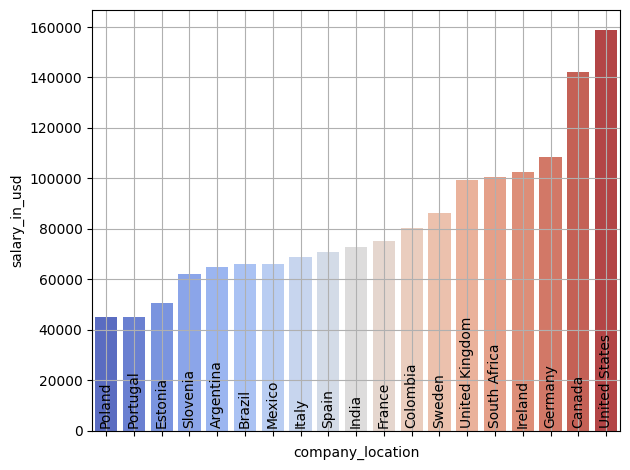

In [10]:
sns.barplot(data=d_e_media, x='company_location', y='salary_in_usd', hue="company_location", palette="coolwarm")
for idx, value in enumerate(d_e_media['company_location']):
    plt.text(idx, 1000, str(d_e_media['company_location'][idx]), ha='center', va='bottom', rotation=90)
plt.gca().set_xticklabels([])
plt.tight_layout() 
plt.grid(True, zorder=0)


In [11]:
def get_iso_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

In [12]:
d_e_media['iso_a3'] = d_e_media['company_location'].apply(get_iso_code)

In [13]:
d_e_media

,company_location,salary_in_usd,iso_a3
0,Poland,44876.000000,POL
1,Portugal,44989.000000,PRT
2,Estonia,50529.000000,EST
3,Slovenia,62081.000000,SVN
4,Argentina,65000.000000,ARG
5,Brazil,66000.000000,BRA
6,Mexico,66000.000000,MEX
7,Italy,69005.000000,ITA
8,Spain,70671.625000,ESP
9,India,72656.250000,IND


In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/z9/0q_jbzwj5x7c37rdc3svrsl40000gn/T/ipykernel_9067/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [15]:
join = world.merge(d_e_media, left_on='iso_a3', right_on='iso_a3', how="left")
join

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,company_location,salary_in_usd
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,142230.236842
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,158810.166897
...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN


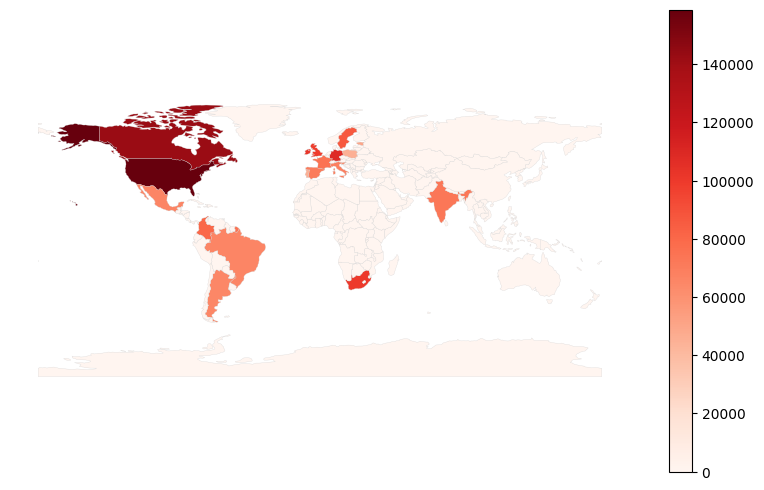

In [16]:
join['salary_in_usd'] = join['salary_in_usd'].fillna(0)
fig, ax = plt.subplots(figsize=(10, 6))
join.plot(column='salary_in_usd', linewidth=0.2, 
          ax=ax, edgecolor='lightgray', legend=True, 
          cmap='Reds',
          missing_kwds={'color': 'gray'})
ax.set_axis_off()
plt.show()